In [16]:
import numpy as np
import matplotlib.pyplot as plt
import time
plt.ion()

plots = True
# Illuatrate
N = 10         # number of training points.
n = 50         # number of test points.

# Go Crazy
N = 2000
n = 10000

start = time.time()

In [17]:
# This is the true unknown function we are trying to approximate
f = lambda x: np.sin(0.9*x).flatten()


# Define the kernel
def kernel(a, b):
    """ GP squared exponential kernel """
    kernelParameter = 0.1
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/kernelParameter) * sqdist)

s = 0.005    # noise variance.

# Sample some input points and noisy versions of the function evaluated at
# these points. 
X = np.random.uniform(-5, 5, size=(N,1))
y = f(X) + s*np.random.randn(N)

K = kernel(X, X)
L = np.linalg.cholesky(K + s*np.eye(N))

# points we're going to make predictions at.
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X, Xtest))
mu = np.dot(Lk.T, np.linalg.solve(L, y))

# compute the variance at our test points.
K_ = kernel(Xtest, Xtest)
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
s = np.sqrt(s2)

print(time.time() - start)

3.329246997833252


3.36930251121521


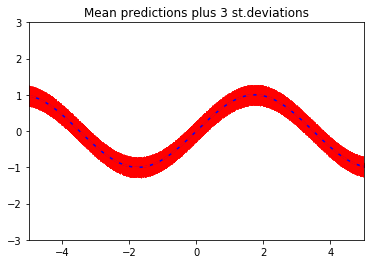

In [18]:
# PLOTS:
if plots:
    plt.figure(1)
    plt.clf()
    plt.plot(X, y, 'r+', ms=20)
    plt.plot(Xtest, f(Xtest), 'b-')
    plt.gca().fill_between(Xtest.flat, mu-3*s, mu+3*s, color="#dddddd")
    plt.plot(Xtest, mu, 'r--', lw=2)
    plt.title('Mean predictions plus 3 st.deviations')
    plt.axis([-5, 5, -3, 3])

print(time.time() - start)

9.904136896133423


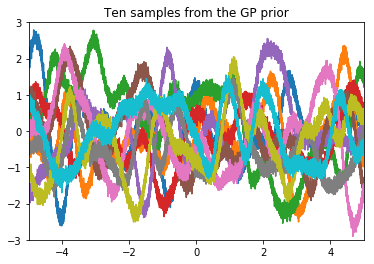

In [19]:
# draw samples from the prior at our test points.
L = np.linalg.cholesky(K_ + 0.01*np.eye(n))
f_prior = np.dot(L, np.random.normal(size=(n,10)))

if plots:
    plt.figure(2)
    plt.clf()
    plt.plot(Xtest, f_prior)
    plt.title('Ten samples from the GP prior')
    plt.axis([-5, 5, -3, 3])

print(time.time() - start)

15.348980188369751


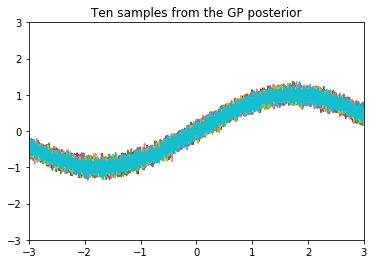

In [20]:
# draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ + 0.01*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,10)))

if plots:
    plt.figure(3)
    plt.clf()
    plt.plot(Xtest, f_post)
    plt.title('Ten samples from the GP posterior')
    plt.axis([-3, 3, -3, 3])

print(time.time() - start)